# Assignment 3 
Text Classifier using LTSM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [5]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Our data consists of 2 labels: Ham & Spam

Let's check the count of each label

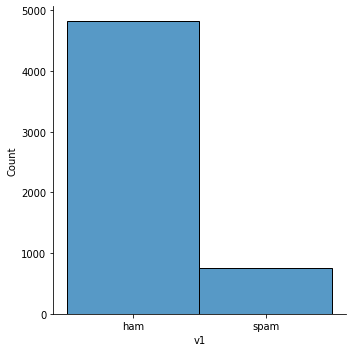

In [13]:
sns.displot(df['v1'])

In [14]:
# Processing the labels
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [16]:
# splitting of data with ratio 7:3 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [18]:
# Tokenize data using tokenizer, add padding to have same shape
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [19]:
# Classification model is built using RNN 
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [20]:
model = RNN()
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [21]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [22]:
# Fit onto training data
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
25/25 [==============================] - 7s 204ms/step - loss: 0.4757 - accuracy: 0.8196 - val_loss: 0.2000 - val_accuracy: 0.9000
Epoch 2/10
25/25 [==============================] - 5s 183ms/step - loss: 0.1594 - accuracy: 0.9467 - val_loss: 0.0832 - val_accuracy: 0.9795
Epoch 3/10
25/25 [==============================] - 5s 182ms/step - loss: 0.0677 - accuracy: 0.9824 - val_loss: 0.0461 - val_accuracy: 0.9872
Epoch 4/10
25/25 [==============================] - 5s 183ms/step - loss: 0.0357 - accuracy: 0.9902 - val_loss: 0.0411 - val_accuracy: 0.9885
Epoch 5/10
25/25 [==============================] - 5s 184ms/step - loss: 0.0291 - accuracy: 0.9915 - val_loss: 0.0365 - val_accuracy: 0.9885
Epoch 6/10
25/25 [==============================] - 5s 181ms/step - loss: 0.0208 - accuracy: 0.9946 - val_loss: 0.0368 - val_accuracy: 0.9885


In [23]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [24]:
accr = model.evaluate(test_sequences_matrix,Y_test)

53/53 [==============================] - 1s 21ms/step - loss: 0.0659 - accuracy: 0.9833


In [27]:
print('Loss: {:0.3f} and  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Loss: 0.066 and  Accuracy: 0.983
